In [1]:
# IMPORT LIBRARIES - VIZENV ENVIRONMENT
import pandas as pd
from pathlib import Path
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# bring in data
data_location = Path("../Histories/joined_forexdata.csv")
df = pd.read_csv(data_location)
df.head()

,DateTime,Open,High,Low,Close,Volume
0,2020-02-02 17:00,1.10939,1.10939,1.10939,1.10939,0.0
1,2020-02-02 17:01,1.10934,1.10934,1.10921,1.10921,0.0
2,2020-02-02 17:02,1.10922,1.10922,1.10922,1.10922,0.0
3,2020-02-02 17:03,1.10923,1.10923,1.10918,1.10918,0.0
4,2020-02-02 17:04,1.10921,1.10921,1.10921,1.10921,0.0


In [3]:
# REASIGN INDEX TO DATE-TIME AND DROP EXTRA COLUMN
df.set_index(df["DateTime"], inplace = True)
df = df.drop(columns = "DateTime")
df.head()

,Open,High,Low,Close,Volume
DateTime,,,,,
2020-02-02 17:00,1.10939,1.10939,1.10939,1.10939,0.0
2020-02-02 17:01,1.10934,1.10934,1.10921,1.10921,0.0
2020-02-02 17:02,1.10922,1.10922,1.10922,1.10922,0.0
2020-02-02 17:03,1.10923,1.10923,1.10918,1.10918,0.0
2020-02-02 17:04,1.10921,1.10921,1.10921,1.10921,0.0


In [4]:
# df.index
#DROP NAs and calculate returns minute over minute
df['return'] = df['Close'].dropna().pct_change()
df.head()

,Open,High,Low,Close,Volume,return
DateTime,,,,,,
2020-02-02 17:00,1.10939,1.10939,1.10939,1.10939,0.0,NaN
2020-02-02 17:01,1.10934,1.10934,1.10921,1.10921,0.0,-0.000162
2020-02-02 17:02,1.10922,1.10922,1.10922,1.10922,0.0,0.000009
2020-02-02 17:03,1.10923,1.10923,1.10918,1.10918,0.0,-0.000036
2020-02-02 17:04,1.10921,1.10921,1.10921,1.10921,0.0,0.000027


In [5]:
df.index = pd.to_datetime(df.index)

In [6]:
# Set bollinger band window
bollinger_window = 20

# Calculate rolling mean and standard deviation
df['bollinger_mid_band'] = df['Close'].rolling(window=bollinger_window).mean()
df['bollinger_std'] = df['Close'].rolling(window=20).std()

# Calculate upper and lowers bands of bollinger band
df['bollinger_upper_band']  = df['bollinger_mid_band'] + (df['bollinger_std'] * 1)
df['bollinger_lower_band']  = df['bollinger_mid_band'] - (df['bollinger_std'] * 1)

# Calculate bollinger band trading signal
df['bollinger_long'] = np.where(df['Close'] < df['bollinger_lower_band'], 1.0, 0.0)
df['bollinger_short'] = np.where(df['Close'] > df['bollinger_upper_band'], -1.0, 0.0)
df['bollinger_signal'] = df['bollinger_long'] + df['bollinger_short']

df

,Open,High,Low,Close,Volume,return,bollinger_mid_band,bollinger_std,bollinger_upper_band,bollinger_lower_band,bollinger_long,bollinger_short,bollinger_signal
DateTime,,,,,,,,,,,,,
2020-02-02 17:00:00,1.10939,1.10939,1.10939,1.10939,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2020-02-02 17:01:00,1.10934,1.10934,1.10921,1.10921,0.0,-0.000162,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2020-02-02 17:02:00,1.10922,1.10922,1.10922,1.10922,0.0,0.000009,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2020-02-02 17:03:00,1.10923,1.10923,1.10918,1.10918,0.0,-0.000036,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2020-02-02 17:04:00,1.10921,1.10921,1.10921,1.10921,0.0,0.000027,NaN,NaN,NaN,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-20 15:54:00,1.06985,1.06993,1.06936,1.06937,0.0,-0.000449,1.069219,0.000391,1.069610,1.068828,0.0,0.0,0.0
2020-03-20 15:55:00,1.06936,1.07002,1.06936,1.06976,0.0,0.000365,1.069273,0.000386,1.069660,1.068887,0.0,-1.0,-1.0
2020-03-20 15:56:00,1.06968,1.06997,1.06968,1.06978,0.0,0.000019,1.069318,0.000390,1.069709,1.068928,0.0,-1.0,-1.0


In [7]:
df = df.dropna()
df

,Open,High,Low,Close,Volume,return,bollinger_mid_band,bollinger_std,bollinger_upper_band,bollinger_lower_band,bollinger_long,bollinger_short,bollinger_signal
DateTime,,,,,,,,,,,,,
2020-02-02 17:19:00,1.10911,1.10913,1.10910,1.10910,0.0,-0.000009,1.109184,0.000061,1.109244,1.109123,1.0,0.0,1.0
2020-02-02 17:20:00,1.10909,1.10912,1.10909,1.10911,0.0,0.000009,1.109170,0.000039,1.109208,1.109131,1.0,0.0,1.0
2020-02-02 17:21:00,1.10912,1.10913,1.10909,1.10910,0.0,-0.000009,1.109164,0.000041,1.109205,1.109123,1.0,0.0,1.0
2020-02-02 17:22:00,1.10911,1.10912,1.10877,1.10883,0.0,-0.000243,1.109145,0.000083,1.109228,1.109061,1.0,0.0,1.0
2020-02-02 17:23:00,1.10884,1.10885,1.10884,1.10885,0.0,0.000018,1.109128,0.000106,1.109234,1.109022,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-20 15:54:00,1.06985,1.06993,1.06936,1.06937,0.0,-0.000449,1.069219,0.000391,1.069610,1.068828,0.0,0.0,0.0
2020-03-20 15:55:00,1.06936,1.07002,1.06936,1.06976,0.0,0.000365,1.069273,0.000386,1.069660,1.068887,0.0,-1.0,-1.0
2020-03-20 15:56:00,1.06968,1.06997,1.06968,1.06978,0.0,0.000019,1.069318,0.000390,1.069709,1.068928,0.0,-1.0,-1.0


In [8]:
import matplotlib.pyplot as plt

In [9]:
df.index

DatetimeIndex(['2020-02-02 17:19:00', '2020-02-02 17:20:00',
               '2020-02-02 17:21:00', '2020-02-02 17:22:00',
               '2020-02-02 17:23:00', '2020-02-02 17:24:00',
               '2020-02-02 17:25:00', '2020-02-02 17:26:00',
               '2020-02-02 17:27:00', '2020-02-02 17:28:00',
               ...
               '2020-03-20 15:49:00', '2020-03-20 15:50:00',
               '2020-03-20 15:51:00', '2020-03-20 15:52:00',
               '2020-03-20 15:53:00', '2020-03-20 15:54:00',
               '2020-03-20 15:55:00', '2020-03-20 15:56:00',
               '2020-03-20 15:57:00', '2020-03-20 15:58:00'],
              dtype='datetime64[ns]', name='DateTime', length=50272, freq=None)

In [28]:
df2 = df.loc[: ,]['2020-03-20']

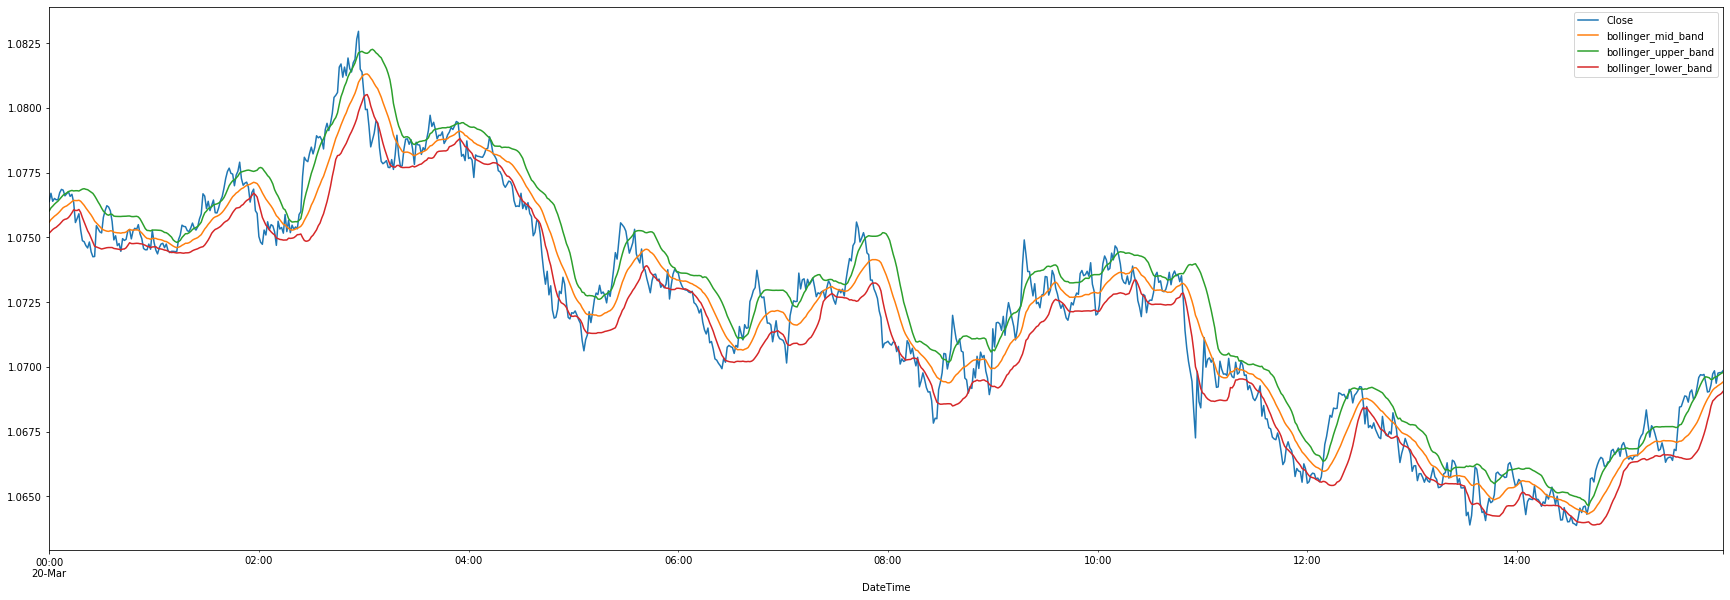

In [30]:
# df[['Close','bollinger_mid_band','bollinger_upper_band','bollinger_lower_band']].plot(figsize=(20,10))
df2[['Close','bollinger_mid_band','bollinger_upper_band','bollinger_lower_band']].plot(figsize=(30,10))

In [13]:
# CODE STILL IN DEVELOPMENT!!! DOES NOT WORK

for i in df.index ('2020-03-09', '2020-03-16'):
    try:
        x = df[(i).split()[0]].Close.values
        pd.Series(x).plot(figsize=(20,10))
    except:
        pass

# df[['Close','bollinger_mid_band','bollinger_upper_band','bollinger_lower_band']].plot(figsize=(20,10))

TypeError: 'DatetimeIndex' object is not callable

In [ ]:
# df2 = df.loc[:['Close']]['2020-03-13':'2020-03-20']